Comparing Step vs. Sigmoid Activation


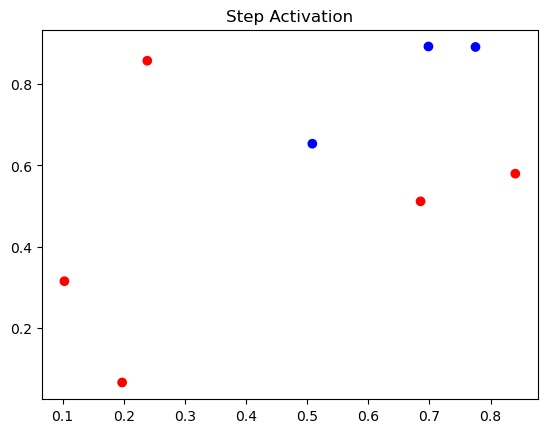

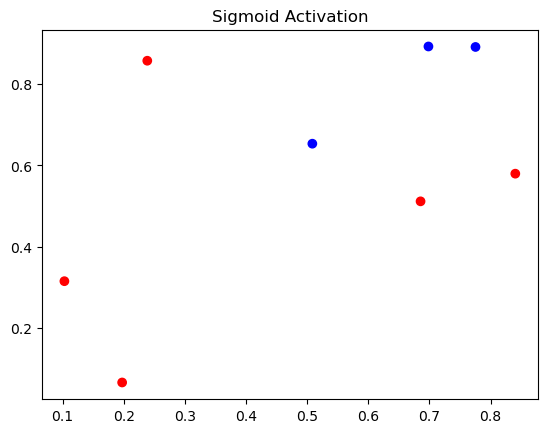

Comparing Sigmoid vs. Tanh Activation


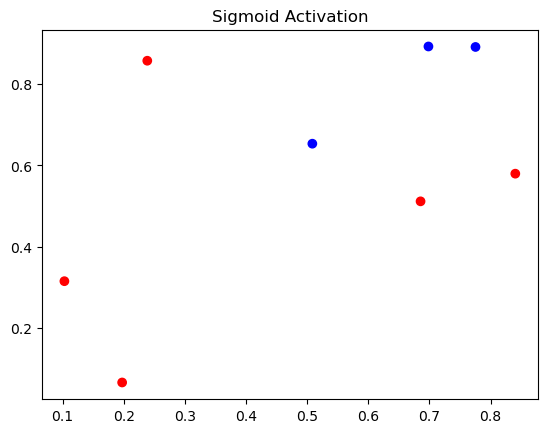

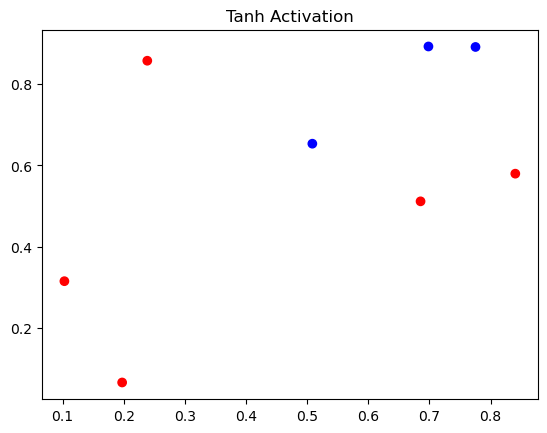

Comparing ReLU vs. Sigmoid Activation


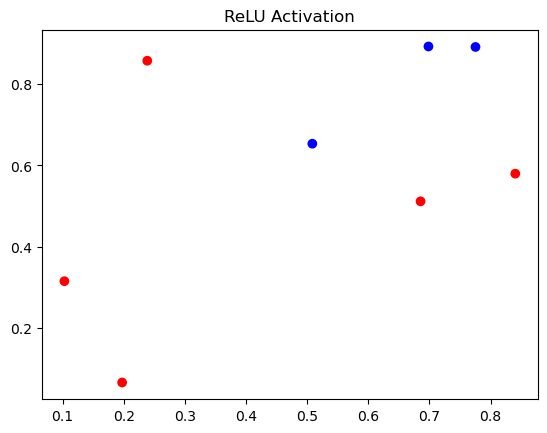

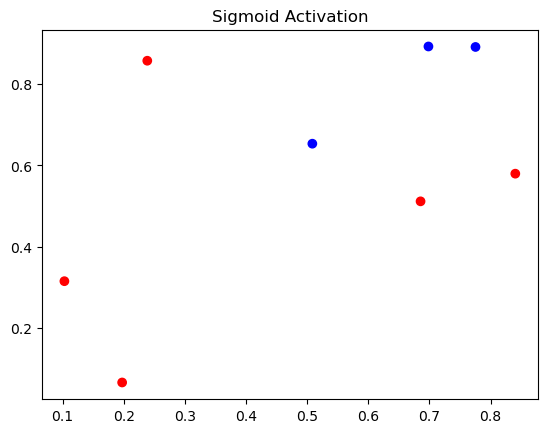

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Implement Single Layer Perceptron
class AdaptivePerceptron:
    def __init__(self, input_dim, alpha=0.1, iterations=10, activation_func='step'):
        self.weights = np.zeros(input_dim + 1)  # Including bias term
        self.alpha = alpha
        self.iterations = iterations
        self.activation_func = activation_func

    # 2. Modify the Perceptron to Use Sigmoid, Tanh, and ReLU Activation Functions
    def apply_activation(self, net_input):
        if self.activation_func == 'step':
            return 1 if net_input >= 0 else 0
        elif self.activation_func == 'sigmoid':
            return 1 / (1 + np.exp(-net_input))
        elif self.activation_func == 'tanh':
            return np.tanh(net_input)
        elif self.activation_func == 'relu':
            return max(0, net_input)
        else:
            raise ValueError("Unsupported activation function")

    def make_prediction(self, features):
        summation = np.dot(features, self.weights[1:]) + self.weights[0]
        return self.apply_activation(summation)

    def train(self, data, labels):
        for _ in range(self.iterations):
            for sample, expected in zip(data, labels):
                output = self.make_prediction(sample)
                error = expected - output
                self.weights[1:] += self.alpha * error * sample
                self.weights[0] += self.alpha * error

# 3. Train the Model
X_train = np.random.rand(8, 3)  # 8 training samples, 3 features each
y_train = np.random.randint(0, 2, 8)  # Binary class labels
X_val = np.random.rand(5, 3)  # 5 validation samples
y_val = np.random.randint(0, 2, 5)

# Train and Compare Models
activation_options = ['step', 'sigmoid', 'tanh', 'relu']
perceptron_models = {}
for func in activation_options:
    model = AdaptivePerceptron(input_dim=3, activation_func=func)
    model.train(X_train, y_train)
    perceptron_models[func] = model

# 7. Plot the decision boundary for different activation functions
def visualize_decision_boundary(model, X, y, heading):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    plt.title(heading)
    plt.show()

# 4. Compare decision boundaries of Step Function vs. Sigmoid
def compare_step_vs_sigmoid():
    print("Comparing Step vs. Sigmoid Activation")
    visualize_decision_boundary(perceptron_models['step'], X_train, y_train, "Step Activation")
    visualize_decision_boundary(perceptron_models['sigmoid'], X_train, y_train, "Sigmoid Activation")

# 5. Compare decision boundaries of Sigmoid vs. Tanh
def compare_sigmoid_vs_tanh():
    print("Comparing Sigmoid vs. Tanh Activation")
    visualize_decision_boundary(perceptron_models['sigmoid'], X_train, y_train, "Sigmoid Activation")
    visualize_decision_boundary(perceptron_models['tanh'], X_train, y_train, "Tanh Activation")

# 6. Compare ReLU vs. Sigmoid for linear separability
def compare_relu_vs_sigmoid():
    print("Comparing ReLU vs. Sigmoid Activation")
    visualize_decision_boundary(perceptron_models['relu'], X_train, y_train, "ReLU Activation")
    visualize_decision_boundary(perceptron_models['sigmoid'], X_train, y_train, "Sigmoid Activation")

# Execute Comparisons
compare_step_vs_sigmoid()
compare_sigmoid_vs_tanh()
compare_relu_vs_sigmoid()